# PROJECT_DE GEZONDHEIDZORG - DATA INGESTION & EDA

In [33]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import logging
import sqlite3


# DATA INGESTION
#1.DATA EXTRACTION     
#2.DATA TRANSFORMATION      
#3.DATA LOAD

# 1.Data Extraction

In [34]:
dbPath = "../Project1"
con = sqlite3.connect(f'{dbPath}/db.sqlite3')
patient_DF = pd.read_sql('SELECT * FROM rest_api_netlify', con=con)
display(patient_DF)

,id,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar
0,1,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9
1,2,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2
2,3,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5
3,4,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9
4,5,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5
...,...,...,...,...,...,...,...,...,...
4091,4092,80.3,176.0,115.9,3.7,0.1,5.6,80.7,5.8
4092,4093,75.3,162.0,129.6,3.6,6.2,5.6,71.1,7.6
4093,4094,93.1,189.0,115.3,2.7,9.4,4.9,90.0,6.6
4094,4095,77.9,170.0,90.8,2.3,13.2,0.8,75.9,6.2


# Summary of Dataframe

In [35]:
patient_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        4096 non-null   int64  
 1   genetic   4095 non-null   float64
 2   length    4093 non-null   float64
 3   mass      4094 non-null   float64
 4   exercise  4095 non-null   float64
 5   smoking   4096 non-null   float64
 6   alcohol   4094 non-null   float64
 7   lifespan  4094 non-null   float64
 8   sugar     4095 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 288.1 KB


# Dropping the null cells and sorting the dataframe

In [36]:
patient_DF = patient_DF.dropna()
patient_DF.info()
patient_data_sort=patient_DF.transform(np.sort)
display(patient_data_sort)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4095
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        4084 non-null   int64  
 1   genetic   4084 non-null   float64
 2   length    4084 non-null   float64
 3   mass      4084 non-null   float64
 4   exercise  4084 non-null   float64
 5   smoking   4084 non-null   float64
 6   alcohol   4084 non-null   float64
 7   lifespan  4084 non-null   float64
 8   sugar     4084 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 319.1 KB


,id,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar
0,1,63.9,154.0,50.0,0.1,0.0,0.0,57.0,0.7
1,2,63.9,154.0,50.0,0.1,0.0,0.0,57.0,0.7
2,3,63.9,154.0,50.0,0.1,0.0,0.0,58.7,0.7
3,4,64.0,154.0,50.1,0.1,0.0,0.0,58.9,0.7
4,5,64.0,155.0,50.1,0.1,0.0,0.0,59.5,0.8
...,...,...,...,...,...,...,...,...,...
4091,4092,102.1,214.0,163.1,5.4,22.1,6.0,103.2,13.8
4092,4093,102.2,214.0,163.3,5.4,22.1,6.0,103.5,13.8
4093,4094,102.2,214.0,163.5,5.4,22.1,6.0,103.9,13.8
4094,4095,102.2,214.0,163.5,5.4,22.1,6.0,104.1,13.8


# Find duplicated records an drop if any

In [37]:
#To find duplicate values

#patient_DF = patient_DF[patient_DF.duplicated( keep =False)]

# Clean the records by coercing the errors

In [38]:
patient_DF1 = patient_DF.apply(pd.to_numeric, errors='coerce')
patient_DF2 = patient_DF1[patient_DF1.select_dtypes(include=[np.number]).ge(0).all(1)]



# 3.Load Cleaned Data

In [39]:
patient_DF2.to_csv('cleaned_data.csv',header = True, index =False)

In [40]:
patient_DF2 = pd.read_csv('../Project1/cleaned_data.csv',',')
display(patient_DF2)
patient_DF2.info()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9436\2462960049.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  patient_DF2 = pd.read_csv('../Project1/cleaned_data.csv',',')


,id,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar
0,1,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9
1,2,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2
2,3,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5
3,4,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9
4,5,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5
...,...,...,...,...,...,...,...,...,...
4079,4092,80.3,176.0,115.9,3.7,0.1,5.6,80.7,5.8
4080,4093,75.3,162.0,129.6,3.6,6.2,5.6,71.1,7.6
4081,4094,93.1,189.0,115.3,2.7,9.4,4.9,90.0,6.6
4082,4095,77.9,170.0,90.8,2.3,13.2,0.8,75.9,6.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4084 entries, 0 to 4083
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        4084 non-null   int64  
 1   genetic   4084 non-null   float64
 2   length    4084 non-null   float64
 3   mass      4084 non-null   float64
 4   exercise  4084 non-null   float64
 5   smoking   4084 non-null   float64
 6   alcohol   4084 non-null   float64
 7   lifespan  4084 non-null   float64
 8   sugar     4084 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 287.3 KB


In [41]:
#patient_DF2.to_sql('theCleanedData', con = con, index= False)

# EXPLORATORY DATA ANALYSIS / Data Visualiasation

# Adding the Column BMI based on length and mass

In [43]:
#patient_DF2["BMI"] = (patient_DF2["mass"]/patient_DF2["length"]**2)*10000

#display(patient_DF2)
#patient_DF2.to_sql('BMI_table', con = con, index =False)


# Descriptive Statistics

In [44]:
patient_DF2.describe()

,id,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,BMI
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,2047.673115,82.278624,183.885162,92.275930,2.403477,9.809035,2.266846,80.177693,6.487169,27.682015
std,1183.074485,7.441333,12.622858,25.801031,1.170426,6.918614,1.801044,7.840508,2.708622,8.711661
min,1.000000,63.900000,154.000000,50.000000,0.100000,0.000000,0.000000,57.000000,0.700000,11.320500
25%,1023.750000,77.600000,175.000000,71.475000,1.500000,3.375000,0.600000,75.000000,4.400000,20.938542
50%,2046.500000,81.800000,184.000000,89.500000,2.200000,9.500000,1.700000,79.700000,6.300000,26.476726
75%,3073.250000,86.700000,193.000000,110.825000,3.200000,15.900000,4.000000,85.200000,8.400000,33.207260
max,4096.000000,102.200000,214.000000,163.600000,5.500000,22.200000,6.000000,105.100000,13.800000,65.869494


# Distribution of Data-Histogram

In [ ]:
#patient_DF2 = patient_DF2.drop(['length','mass'], axis =1)
patient_DF2_hist = patient_DF2.hist( figsize=(20,10), grid = False, bins = 50, color = "green", ec = "white")

# Heat Map - Correlation between Variables

In [ ]:
fig = plt.figure(figsize=(8,7))
sns.heatmap(patient_DF2.corr(), annot = True)

# Box Plot

In [ ]:
plt.figure(figsize=(10,10))
#ax = sns.boxplot(data = patient_DF2)
ax = sns.boxplot(data = patient_DF2['lifespan'])

In [ ]:

# to fine the record of outliers

# Q1=patient_DF2.quantile(0.25)
# Q3=patient_DF2.quantile(0.75)
# IQR = Q3 - Q1
# print(Q1)
# print(Q3)
# print(IQR)

# patient_DF2 =patient_DF2[~((patient_DF2<(Q1-1.5*IQR)) | (patient_DF2>(Q3+1.5*IQR))).any(axis=1)]
# sns.boxplot(x =patient_DF2['lifespan'])

# Scatter Plot 

In [ ]:
patient_DF2.plot.scatter(x ='BMI', y= 'lifespan', s = 'lifespan' , c= 'darkblue',figsize= (15,10), alpha = 0.25)

# Pair Plot - bivariate distributions

In [ ]:
#patient_DF3 = patient_DF2.drop(['length','mass'], axis =1)

#sns.pairplot(patient_DF3)

# Clustering using Groupby and Dendrogram

In [45]:
intervals = [ 10, 20, 25, 30, 40]
col = patient_DF2['BMI']
patient_DF2['BMI Groups'] = pd.cut(x=col, bins=intervals)
patient_DF2['BMI Groups']


0       (25.0, 30.0]
1       (30.0, 40.0]
2       (30.0, 40.0]
3                NaN
4       (20.0, 25.0]
            ...     
4079    (30.0, 40.0]
4080             NaN
4081    (30.0, 40.0]
4082    (30.0, 40.0]
4083    (30.0, 40.0]
Name: BMI Groups, Length: 4084, dtype: category
Categories (4, interval[int64, right]): [(10, 20] < (20, 25] < (25, 30] < (30, 40]]

In [46]:
patient_DF2.groupby('BMI Groups')['BMI Groups'].count()

BMI Groups
(10, 20]     860
(20, 25]     886
(25, 30]     851
(30, 40]    1109
Name: BMI Groups, dtype: int64

In [47]:
patient_DF2_oh = pd.get_dummies(patient_DF2)
 # Display the one-hot encoded dataframe
patient_DF2_oh 

,id,genetic,length,mass,exercise,smoking,alcohol,lifespan,sugar,BMI,"BMI Groups_(10, 20]","BMI Groups_(20, 25]","BMI Groups_(25, 30]","BMI Groups_(30, 40]"
0,1,73.9,185.0,99.7,0.9,0.0,2.4,73.1,6.9,29.130752,0,0,1,0
1,2,86.0,172.0,105.4,1.8,8.1,0.4,85.0,4.2,35.627366,0,0,0,1
2,3,83.3,176.0,111.4,1.1,0.8,4.6,81.6,7.5,35.963326,0,0,0,1
3,4,82.8,164.0,111.4,4.7,11.8,1.0,81.0,2.9,41.418798,0,0,0,0
4,5,78.7,178.0,71.6,1.5,8.3,4.9,75.0,5.5,22.598157,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,4092,80.3,176.0,115.9,3.7,0.1,5.6,80.7,5.8,37.416064,0,0,0,1
4080,4093,75.3,162.0,129.6,3.6,6.2,5.6,71.1,7.6,49.382716,0,0,0,0
4081,4094,93.1,189.0,115.3,2.7,9.4,4.9,90.0,6.6,32.277932,0,0,0,1
4082,4095,77.9,170.0,90.8,2.3,13.2,0.8,75.9,6.2,31.418685,0,0,0,1


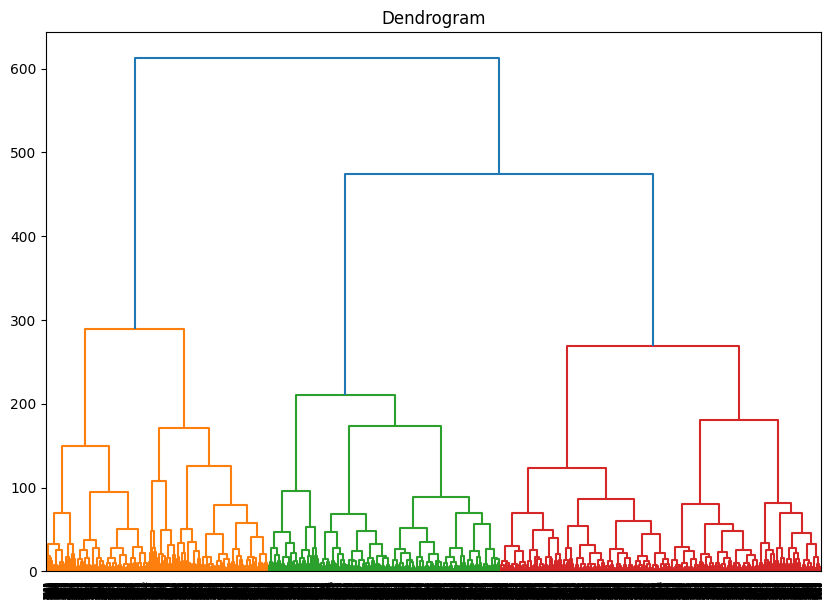

In [48]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendrogram")


selected_data =patient_DF2_oh.iloc[:, 7:10]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

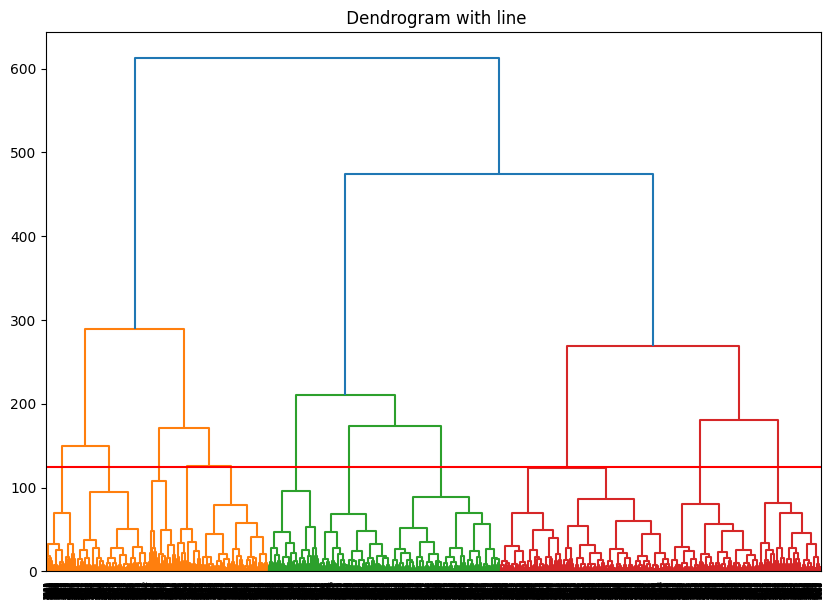

In [49]:
plt.figure(figsize=(10, 7))
plt.title(" Dendrogram with line")
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 125, color = 'r', linestyle = '-')


In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_

In [ ]:
data_labels = clustering_model.labels_
sns.scatterplot(x='BMI', 
                y='lifespan', 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Data')

Pair plot

In [ ]:
patient_DF3 = patient_DF2.drop(['length','mass'], axis =1)

sns.pairplot(patient_DF3)
display(patient_DF3)

Summary - OLS Regression

In [ ]:
X = patient_DF2[ ['exercise','genetic','smoking','alcohol','sugar','BMI'] ].astype(float)
X = sm.add_constant(X)

y = patient_DF2[ "lifespan" ].astype(float)    # y is a series
# y = df.loc[:,"Life Expectancy"].astype(float)   # alternate code, same outcome

# Baseline results - model / fit / summarize, lots of bad Pvalue>0.05
model = sm.OLS(y, X)
results = model.fit()
results.summary()

In [ ]:
from scipy import stats
r, p = stats.pearsonr(patient_DF2.BMI,patient_DF2.lifespan)
print(p, 20)
print(r, 40)

In [ ]:
con.close()